# ABC for alpha-stable models
This project is based on the following paper: https://doi.org/10.1016/j.csda.2010.10.004
which proposes an ABC approach to estimate the parameters of the following type of
model: X1, . . . , Xn are IID and follow an alpha-stable distribution, see Section 3.1 of the
paper for the definition of this type of distribution. Alpha-distributions are stable through
addition. Two prominent examples are the Cauchy and the Gaussian. Outside of these
two cases, the probability density of such a distribution is not tractable (which is why
it makes sense to use ABC). Also, alpha-stable distributions are generally heavy-tailed
(except the Gaussian distribution).

1. Implement the generator for alpha-stable distributions proposed in Appendix B,
and explain why it is valid.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#seed for reproducibilty 
np.random.seed(42)

In [18]:
size = 10000

1. Sample W ∼ Exp(1) to obtain w.

In [4]:
w = np.random.standard_exponential(size=size)

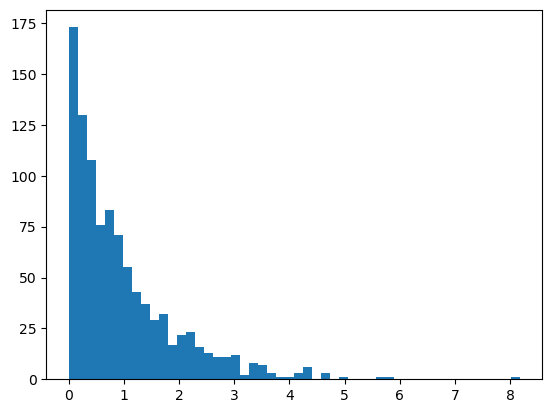

In [5]:
plt.hist(w, bins=50)
plt.show()

2. Sample U ∼ Uniform[−π /2, π /2] to obtain u.

In [6]:
u = np.random.uniform(low = -np.pi/2, high = np.pi/2, size = size)

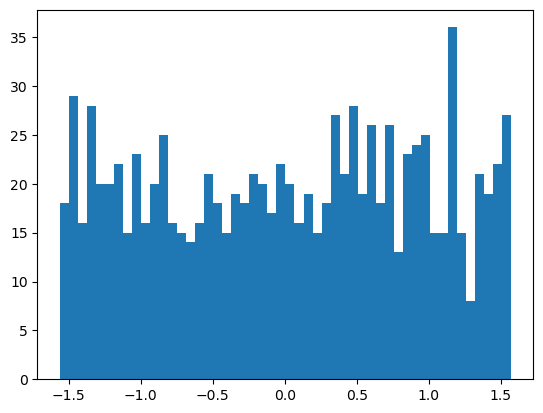

In [7]:
plt.hist(u, bins = 50)
plt.show()

3. Apply transformation to obtain sample y. In this case y will have distribution defined by $\phi_X (t)$ with parameters (α, β, 1, 0).

In [66]:
def univ_alpha_stable_sampler(params,size,seed) :
    alpha,beta,gamma,delta = params["alpha"],params["beta"],params["gamma"],params["delta"]
    #print(alpha,beta,gamma,delta)
    y_bar = 0
    np.random.seed(seed)
    w = np.random.standard_exponential(size=size)
    u = np.random.uniform(low = -np.pi/2, high = np.pi/2, size = size)
    if alpha == 1 :
        y_bar = 2/np.pi*((np.pi/2+beta*u)*np.tan(u)-beta*np.log((np.pi/2*w*np.cos(u))/(np.pi/2+beta*u)))
        return gamma*y_bar + delta
    else :
        S = (1+beta**2*np.tan(np.pi*alpha/2)**2)**(1/(2*alpha))
        B = 1/alpha*np.arctan(beta*np.tan(np.pi*alpha/2))
        #print(S,B)
        y_bar = (S*(np.sin(alpha)*(u+B))*(np.cos(u-alpha*(u+B))/w)**((1-alpha)/alpha))/np.cos(u)**(1/alpha)
        return gamma*y_bar + delta
    

In [27]:
print(levy_stable.parameterization)

S1


1.7 0.9 10 10
1.0577405511756917 -0.25291778970879325


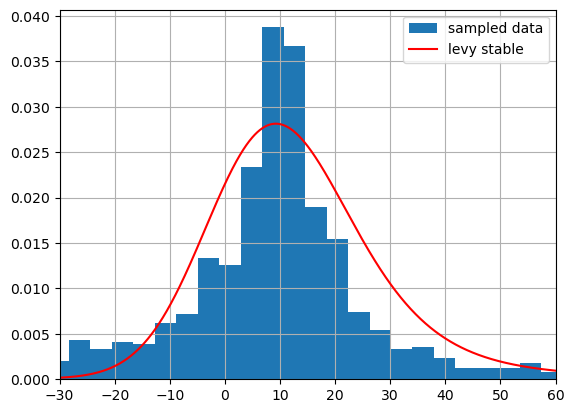

In [40]:
from scipy.stats import levy_stable
from scipy.stats import norm
params = [1.7,0.9,10,10]
seed = 42
size = 1000
levy_stable.parameterization = 'S0'
x = univ_alpha_stable_sampler(params,size,seed)
u = np.linspace(-30,60,size)
y = levy_stable.pdf(u, alpha = 1.7, beta = 0.9, scale = 10, loc = 10)

#rv = norm()
#plt.plot(u, norm.pdf(u, scale = np.sqrt(2)), 'k-', lw=2, label='normal pdf')
plt.hist(x, bins='auto', density=True,  label="sampled data")

plt.xlim(-30,60)
plt.plot(u,y, label = "levy stable ", c = 'r')
plt.grid()
plt.legend()
plt.show()

In [65]:
# Simulation of the "observed data" y :
n = 200
params = {'alpha': 1.7, 'beta' : 0.9, 'gamma' :10, 'delta' : 10}
y = univ_alpha_stable_sampler(params,size=n,seed=42)

1.7 0.9 10 10
1.0577405511756917 -0.25291778970879325


In [ ]:
# Simulation of the data x :

# setting of alpha, beta, gamma and delta according to the uniform priors :


In [55]:

N = 1000


In [62]:
A = np.random.randint(0,10, (4,8))
A

array([[2, 4, 2, 8, 8, 2, 2, 4],
       [1, 5, 6, 8, 5, 2, 4, 3],
       [4, 7, 7, 5, 0, 7, 7, 1],
       [3, 1, 3, 9, 6, 8, 7, 8]])

In [63]:
R = [ row-1 for row in A]
R

[array([1, 3, 1, 7, 7, 1, 1, 3]),
 array([0, 4, 5, 7, 4, 1, 3, 2]),
 array([ 3,  6,  6,  4, -1,  6,  6,  0]),
 array([2, 0, 2, 8, 5, 7, 6, 7])]

In [74]:
# Initialization : 
t = 1
e = [k for k in range(1000,100, -100)]+[k for k in range(100,9, -1)] + [k+0.5 for k in range(9,4,-1)] + [5-k*0.05 for k in range(40)]+[3-0.01*k for k in range(301)] 


alpha = np.random.uniform(low=1.1, high=2, size=N)
beta = np.random.uniform(low=-1, high=1, size=N)
gamma = np.random.uniform(low=0, high=300, size=N)
delta = np.random.uniform(low=-300, high=300, size=N)

#theta = {"alpha" : alpha, "beta": beta, "gamma": gamma, "delta": delta}
theta = np.array([alpha, beta, gamma, delta]).T
theta = np.array([{'alpha' : theta[k][0], 'beta' : theta[k][1], 'gamma': theta[k][2], 'delta': theta[k][3]} for k in range(N)])
def K(u,epsilon) :
    return np.exp(-(u/epsilon)**2)/(np.sqrt(2*np.pi)*epsilon)



In [72]:
x = np.array([univ_alpha_stable_sampler(params,size=n,seed=42) for params in theta ]) 
x

array([[   51.50138201,  -535.16681874,  -305.75189409, ...,
          -72.99342968,   370.8969857 ,   345.33620098],
       [ -235.18990081,  -370.2786224 ,  -285.50381051, ...,
         -248.39640043,  -207.70776514,  -212.60421107],
       [  420.53252456,  -143.78869469,   139.21011205, ...,
          341.10950131,   680.18292473,   640.9046381 ],
       ...,
       [  323.19205582, -1065.83723134,  -478.14471498, ...,
           76.86008787,  1146.06133898,  1051.478841  ],
       [ -177.78491963,  -677.90976696,  -378.00919601, ...,
         -233.41058834,  -109.67538704,  -119.65136597],
       [ -173.60942955, -1346.17144299,  -628.3618919 , ...,
         -297.04799428,    -4.09730473,   -30.96937399]])

In [73]:
x.shape

(1000, 200)

In [77]:
W = np.array([np.sum(K(y-x[k], epsilon=e[0]))/n for k in range(N)])
W

array([3.18717828e-04, 3.76931625e-04, 3.10512690e-04, 3.70813300e-04,
       3.23726968e-04, 3.31242237e-04, 3.46129349e-04, 3.15964750e-04,
       3.00799672e-04, 2.28561902e-04, 3.11073344e-04, 3.74970518e-04,
       3.25565383e-04, 3.96100210e-04, 3.51822910e-04, 2.82030362e-04,
       3.30430255e-04, 3.91992271e-04, 3.88767934e-04, 3.26657170e-04,
       3.84618317e-04, 3.95619568e-04, 1.59290250e-04, 3.38473037e-04,
       2.86769726e-04, 2.95840574e-04, 3.83110787e-04, 3.04751042e-04,
       3.63276361e-04, 2.25123252e-04, 3.31330738e-04, 3.02407729e-04,
       3.05197867e-04, 3.45185154e-04, 1.58741989e-04, 3.61966518e-04,
       3.29520207e-04, 3.73164324e-04, 3.28870427e-04, 3.62441004e-04,
       2.13053416e-04, 3.37853055e-04, 3.08100063e-04, 2.95161188e-04,
       3.35965805e-04, 3.70368567e-04, 3.63082288e-04, 3.84506684e-04,
       3.94947967e-04, 2.93723592e-04, 3.84740794e-04, 3.09172557e-04,
       3.27472647e-04, 3.68087117e-04, 1.83844273e-04, 3.61450941e-04,
      

## Peut être définir une classe particule

In [ ]:
# Resample :
# ?

In [80]:
# Mutation and correction :
t = t+1
i = 1

#(a)
landa = np.diag([0.25,0.25,1,1])

def phi(u,landa=landa) : 
    

M = sum(W*phi())


IndentationError: expected an indented block after function definition on line 7 (3823954620.py, line 9)

In [1]:
import numpy as np

# Exemple de données aléatoires
np.random.seed(123)  # Pour la reproductibilité
donnees = np.random.randn(1000, 4)  # 1000 observations de 4 dimensions

# Calcul de la covariance
covariance = np.cov(donnees, rowvar=False)

# Affichage de la matrice de covariance
print(covariance)


[[ 0.95457653  0.00415482  0.04630785 -0.03329693]
 [ 0.00415482  0.94767103  0.00220586 -0.0675899 ]
 [ 0.04630785  0.00220586  1.02460895  0.06388503]
 [-0.03329693 -0.0675899   0.06388503  0.94171693]]


In [2]:
donnees

array([[-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471],
       [-0.57860025,  1.65143654, -2.42667924, -0.42891263],
       [ 1.26593626, -0.8667404 , -0.67888615, -0.09470897],
       ...,
       [-2.01343005, -0.0287084 , -0.10314246, -1.76131316],
       [-0.18516672,  0.50407682,  1.35456676, -0.9079522 ],
       [-1.81804459, -0.1227329 ,  1.79448602, -0.32050951]])